

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.


## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("D:/ML Assignment 1/petrol.csv")

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [10]:
df.shape

(48, 5)

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [13]:
def plot_boxplot(df):                                    #creating a function for plotting outliers
    df.boxplot()
    plt.grid(False)
    plt.show()

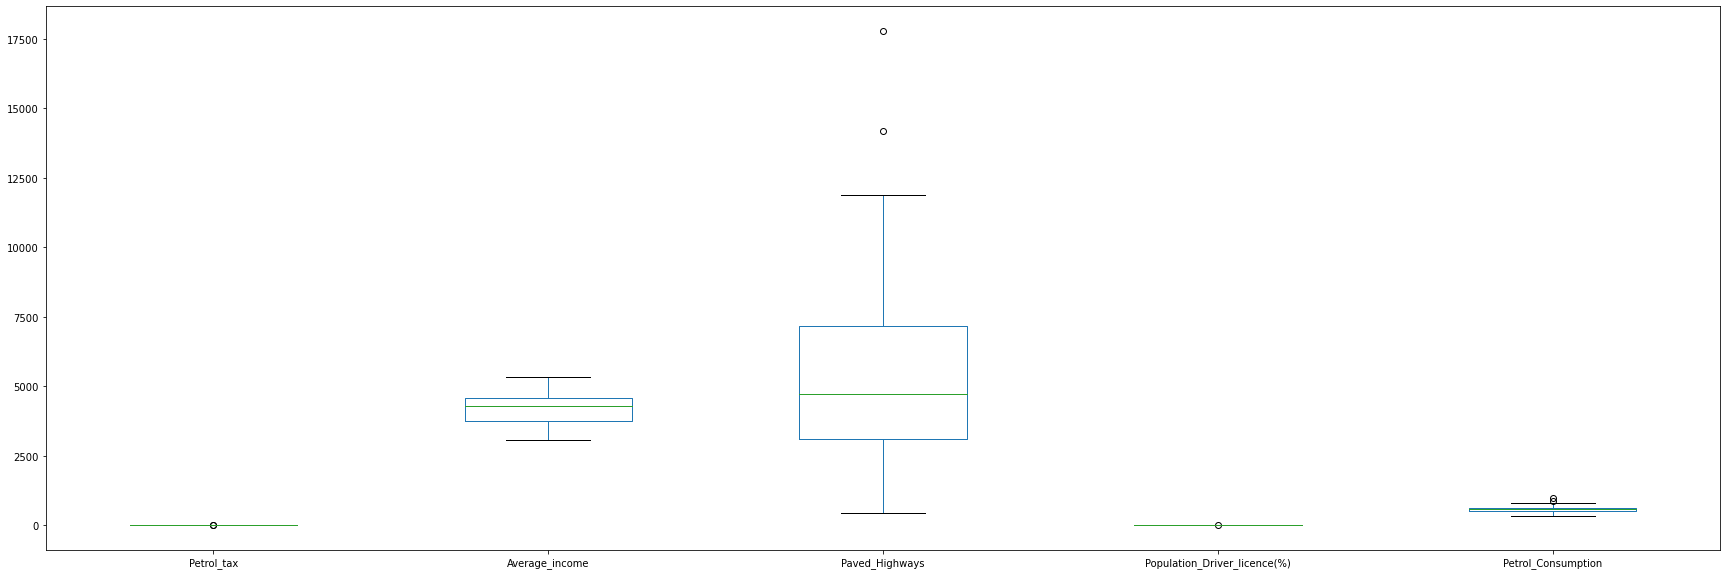

In [15]:
plt.figure(figsize=(30,10))
plot_boxplot(df)

In [16]:
def outliers(df,feat):                               #defining the min. and max. cap for decision criteria in a fnction. 
    Q1=df[feat].quantile(0.25)
    Q3=df[feat].quantile(0.75)
    IQR=Q3-Q1
    
    min_cap=Q1-1.5*IQR
    max_cap=Q3+1.5*IQR
    
    lt=df.index[(df[feat]<min_cap)|(df[feat]>max_cap)]
    
    return lt

In [17]:
#creating an empty list for outliers from all features

index_list = []
for feature in ['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_Consumption']:
    index_list.extend(outliers(df,feature))

In [18]:
index_list

[5, 36, 11, 36, 18, 18, 39]

In [19]:
def remove(df,lt):                            #creating a function to remove the values outside specified criteria
    lt=sorted(set(lt))
    df=df.drop(lt)
    return df

In [20]:
df= remove(df,index_list)                     #removing outliers in the list

In [21]:
df.shape

(43, 5)

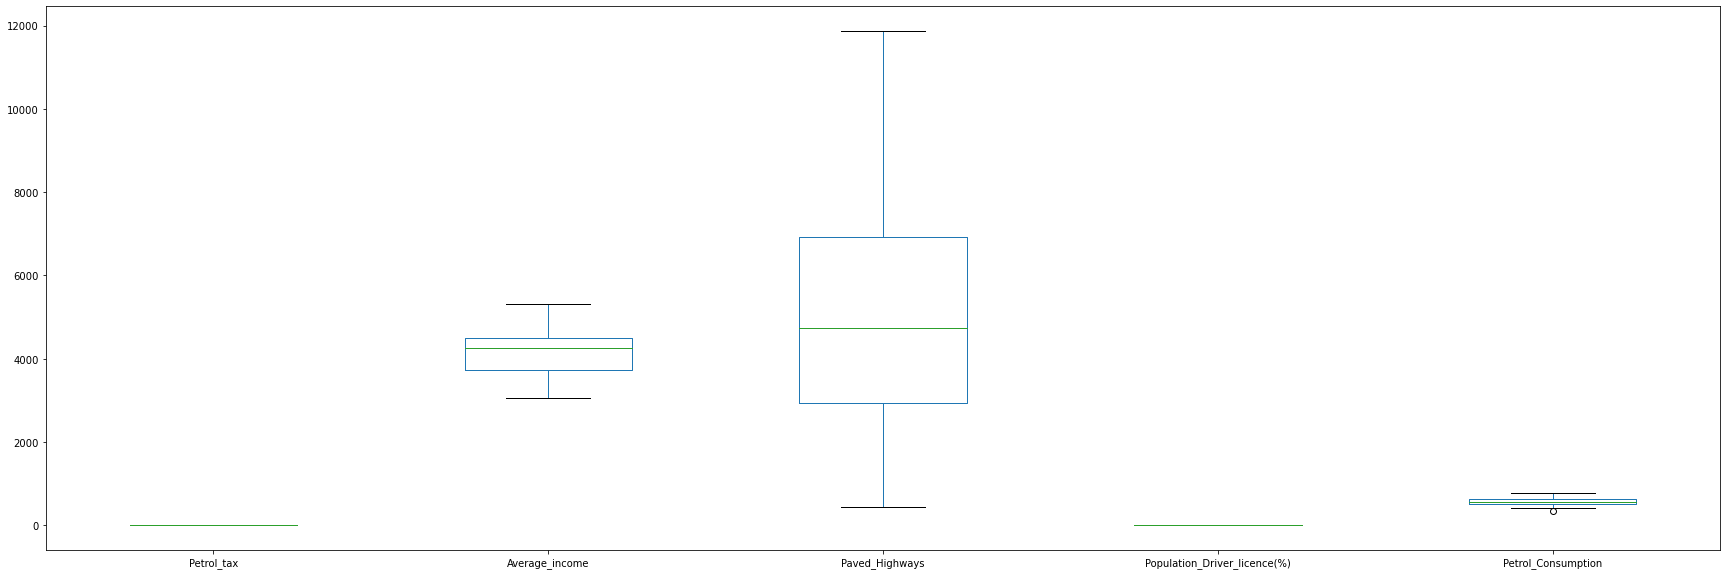

In [22]:
plt.figure(figsize=(30,10))                   #here we can see that the new boxplot does not have any outliers.
plot_boxplot(df)

# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [24]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
Average_income,-0.109537,1.000000,0.051169,0.150689,-0.347326
Paved_Highways,-0.390602,0.051169,1.000000,-0.016193,0.034309
Population_Driver_licence(%),-0.314702,0.150689,-0.016193,1.000000,0.611788
Petrol_Consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [26]:
X=df.drop(['Petrol_Consumption'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,46.6,Petrol_tax
1,54.2,Average_income
2,4.7,Paved_Highways
3,69.1,Population_Driver_licence(%)


In [29]:
X=df.drop(['Petrol_Consumption','Population_Driver_licence(%)','Average_income'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,3.9,Petrol_tax
1,3.9,Paved_Highways


In [30]:
X=df.drop(['Petrol_Consumption','Population_Driver_licence(%)','Average_income'], axis=1)
X

,Petrol_tax,Paved_Highways
0,9.00,1976
1,9.00,1250
2,9.00,1586
3,7.50,2351
4,8.00,431
6,8.00,11868
7,8.00,2138
8,8.00,8577
9,7.00,8507
10,8.00,5939


In [31]:
y=df['Petrol_Consumption']

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#train the model

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

#predict y
y_pred=linear_reg.predict(X_test)

(34, 2) (9, 2) (34,) (9,)


# Question 5 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [36]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
33,628,590.570426
41,699,620.251858
30,571,600.750954
4,410,586.440519
12,525,600.583995
28,574,549.415516
31,554,602.827934
13,508,602.921432
42,632,622.589295


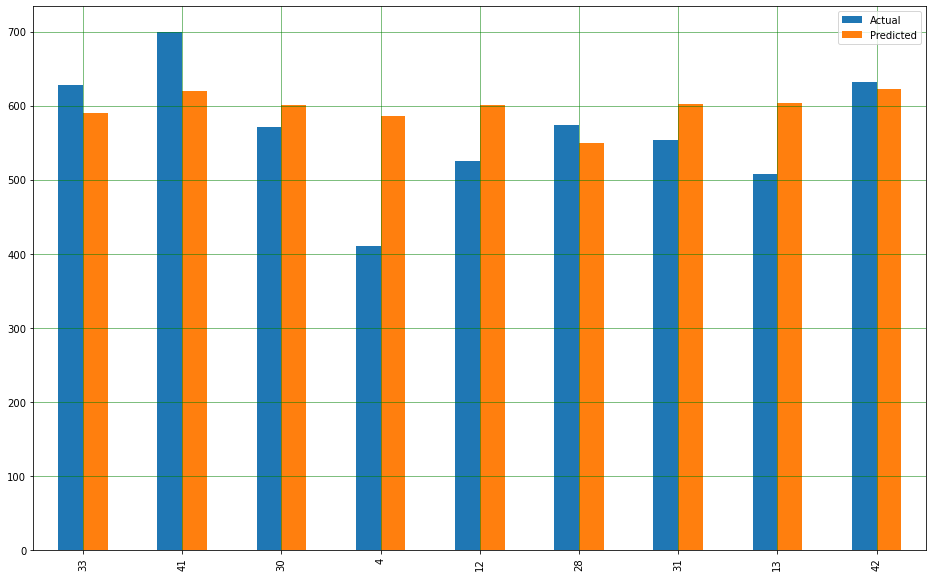

In [35]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

In [37]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: -0.03461787332275157


# Question 7: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [39]:
X1=df.drop(['Petrol_Consumption','Population_Driver_licence(%)'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['features'] = X1.columns
vif.round(1)

,VIF Factor,features
0,32.4,Petrol_tax
1,37.4,Average_income
2,4.5,Paved_Highways


In [40]:
X1=df.drop(['Petrol_Consumption','Population_Driver_licence(%)'], axis=1)
X1

,Petrol_tax,Average_income,Paved_Highways
0,9.00,3571,1976
1,9.00,4092,1250
2,9.00,3865,1586
3,7.50,4870,2351
4,8.00,4399,431
6,8.00,5319,11868
7,8.00,5126,2138
8,8.00,4447,8577
9,7.00,4512,8507
10,8.00,4391,5939


In [42]:
y1=df['Petrol_Consumption']

In [43]:
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

#train the model

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X1_train,y1_train)

#predict y
y1_pred=linear_reg.predict(X1_test)

(34, 3) (9, 3) (34,) (9,)


In [45]:
df2 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df2

,Actual,Predicted
33,628,655.943952
41,699,669.568432
30,571,650.499113
4,410,574.675066
12,525,567.732989
28,574,551.144205
31,554,674.192721
13,508,612.958609
42,632,626.797509


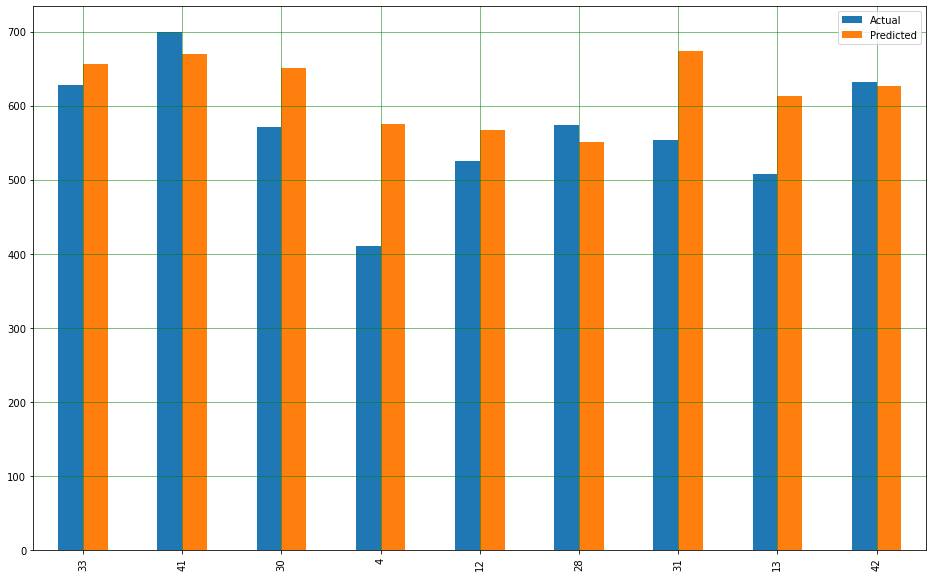

In [46]:
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [47]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y1_test, y1_pred))

R2 Error: -0.1338018147284168


# Question 8: Print the coefficients of the multilinear regression model

In [48]:
import statsmodels.api as sm
X=sm.add_constant(X)
regressorOLS = sm.OLS(y, X).fit()
regressorOLS.summary()

D:\New folder\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.711
Date:                Fri, 13 May 2022   Prob (F-statistic):            0.00658
Time:                        12:49:07   Log-Likelihood:                -247.05
No. Observations:                  43   AIC:                             500.1
Df Residuals:                      40   BIC:                             505.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1003.5030    134.306      7.472      0.000     732.060    1274.946
Petrol_tax       -53.4077     15.844     -3.371      0.002     -85.431     -21.385
Paved_Highways    -0.0052      0.005     -1.090      0.282      -0.015       0.004
==============================================================================
Omnibus:                        2.176   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.953
Skew:                          -0.506   Prob(JB):                        0.377
Kurtosis:                       2.746   Cond. No.                     6.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 9 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

The R-squared value is 0.222 which is very less and thus this model is very poor.